In [1]:
#dependencies
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
sns.set_palette("pastel")

data = pd.read_csv('../../data/train_month_3_with_target.csv',parse_dates = [29,30,32])

# cast types 
cols_binary = ['homebanking_active', 'has_homebanking',
       'has_insurance_21', 'has_insurance_23', 'has_life_insurance_fixed_cap',
       'has_life_insurance_decreasing_cap', 'has_fire_car_other_insurance',
       'has_personal_loan', 'has_mortgage_loan', 'has_current_account',
       'has_pension_saving', 'has_savings_account',
       'has_savings_account_starter', 'has_current_account_starter','customer_self_employed']

data[cols_binary] = data[cols_binary].astype('bool')
data['target'] = data['target'].astype('bool')

cols_object = ['customer_occupation_code', 'customer_postal_code', 'customer_education', 'customer_children',
       'customer_relationship','customer_gender']

data[cols_object] = data[cols_object].astype('object')


# Date to years value conversion 
data['customer_since_all_years'] = (2018-data.customer_since_all.dt.year)
data['customer_since_bank_years'] = (2018-data.customer_since_bank.dt.year)
data['customer_age'] = (2018-data.customer_birth_date.dt.year)

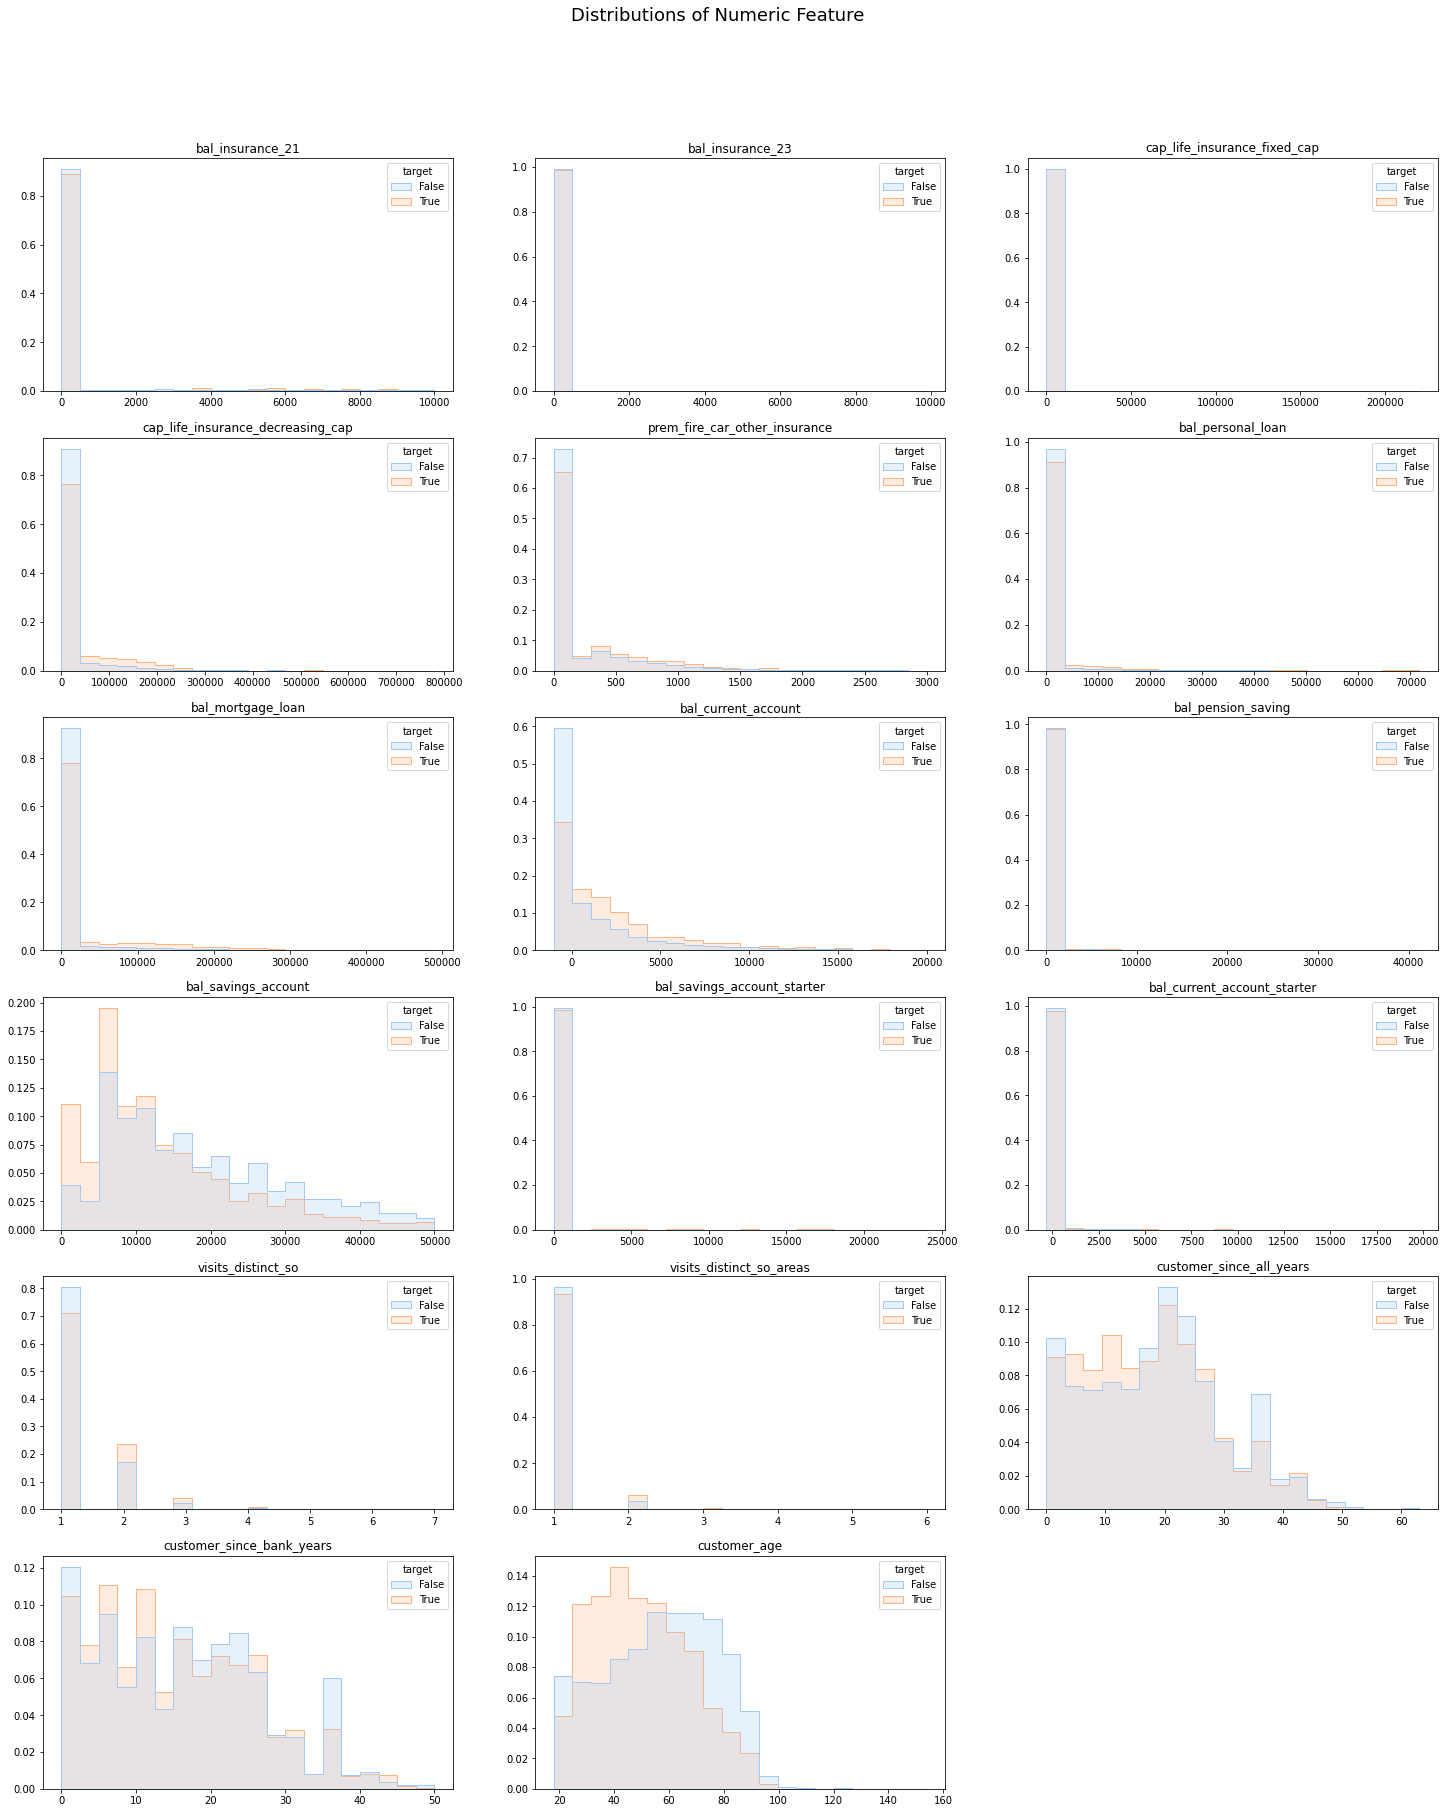

In [20]:
plt.figure(figsize=(25, 30))
plt.subplots_adjust(hspace=0.2)
plt.suptitle("Distributions of Numeric Feature", fontsize=18, y=0.95)

cols_cont = data.select_dtypes(include = 'number').columns
ncols = 3
nrows = len(cols_cont) // ncols + (len(cols_cont) % ncols > 0) # calculate number of rows

for n, col in enumerate(cols_cont):
    ax = plt.subplot(nrows, ncols, n + 1) 
    sns.histplot(data = data
                 ,x = col
                 ,hue = 'target'
                 ,bins = 20
                 ,stat = "probability"
                 ,common_norm = False
                 ,element="step"
                ).set(xlabel=None, ylabel = None)
    plt.title(col)

plt.show()

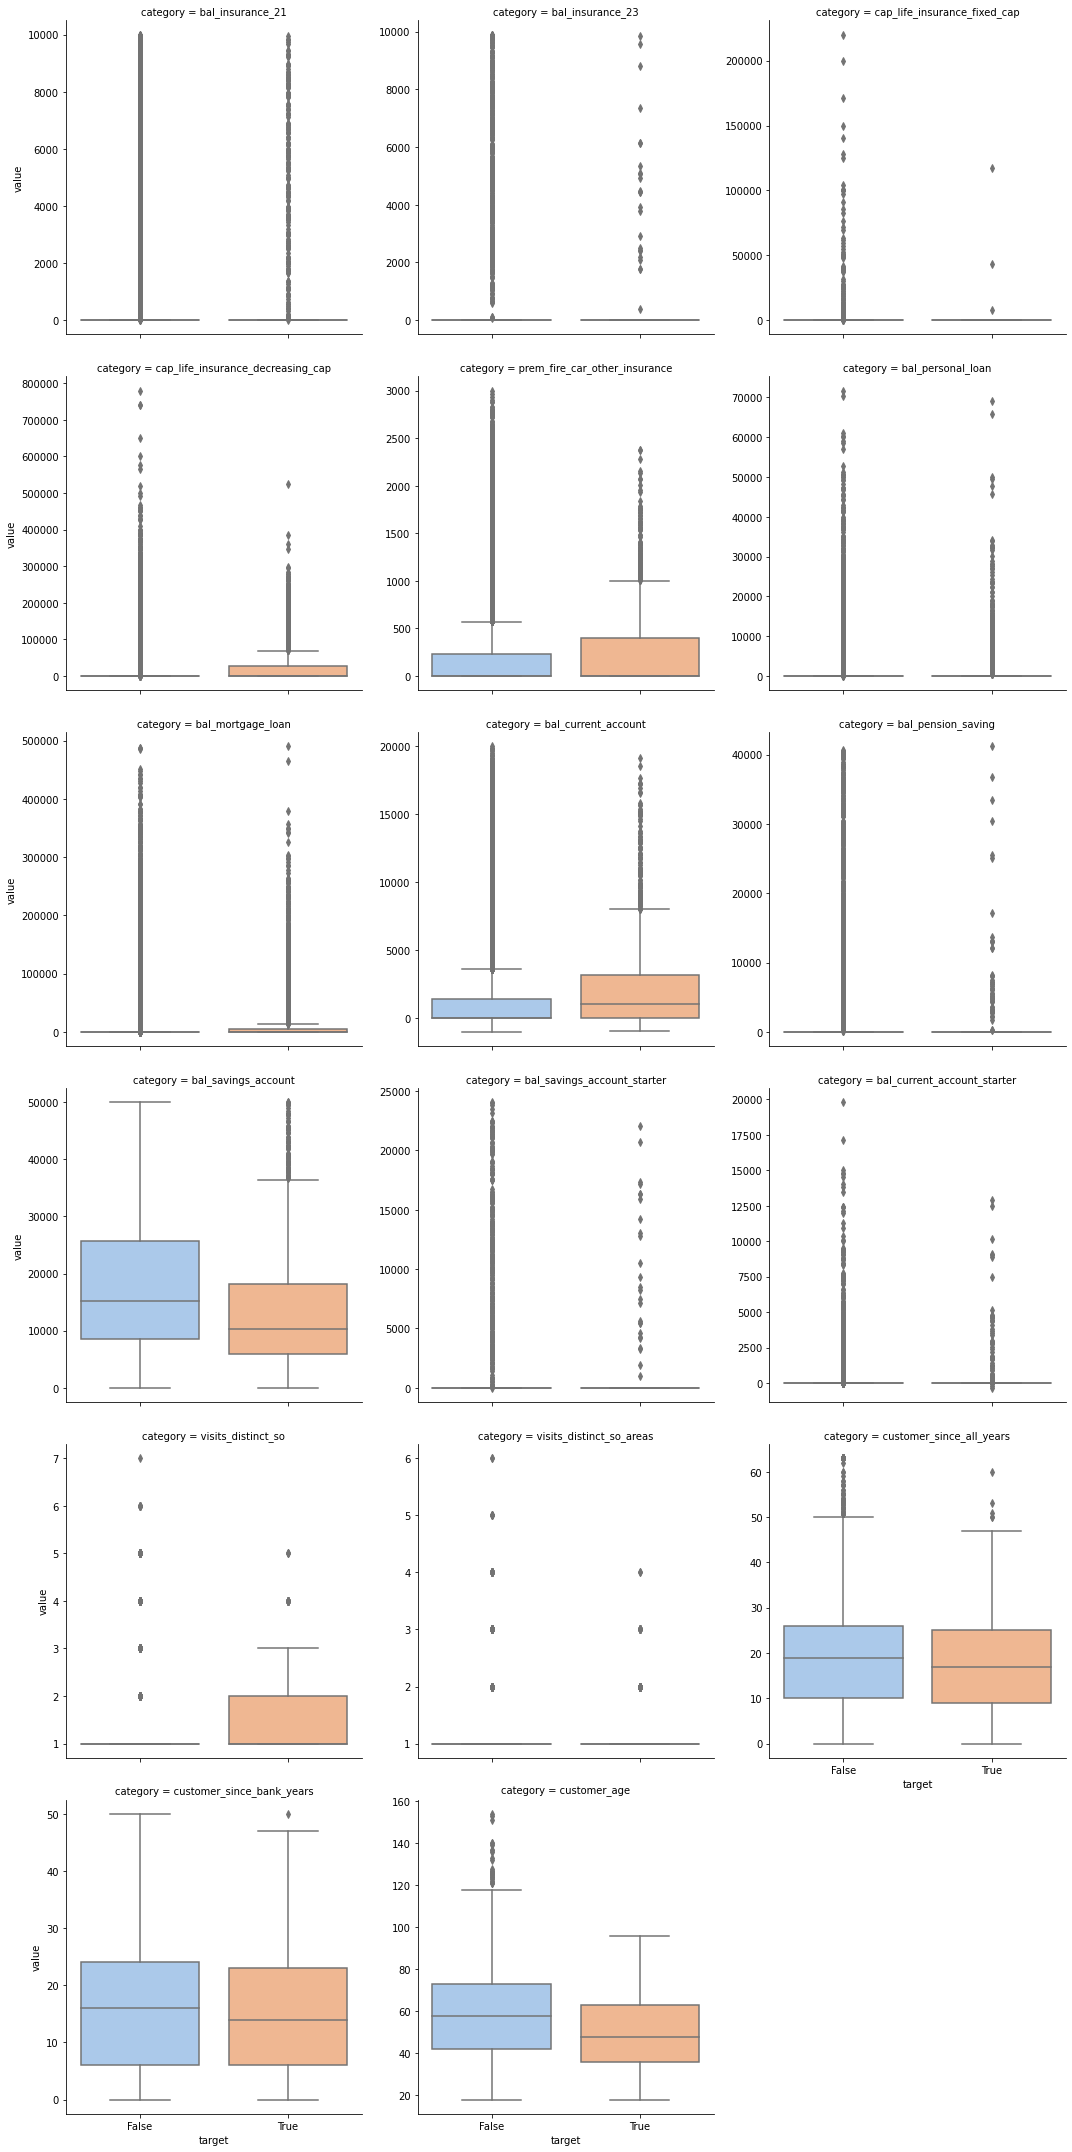

In [17]:
data_melt = data.melt(id_vars = ("client_id","target"), value_vars = cols_cont, var_name = "category")
sns.catplot(data=data_melt
            ,x="target"
            ,y="value"
            ,col="category"
            ,kind="box"
            ,sharey = False
            ,col_wrap=3);

In [5]:
print('-'*65)
print('Customers with savings account balance of 0')
print('-'*65)
print(data[["has_savings_account","bal_savings_account","target"]][data.bal_savings_account <=0].sum())
print('-'*65)
print('Customers with checking account balance <= 0')
print('-'*65)
print(data[["has_current_account","bal_current_account","target"]][data.bal_current_account <=0].sum())

-----------------------------------------------------------------
Customers with savings account balance of 0
-----------------------------------------------------------------
has_savings_account     80
bal_savings_account      0
target                 150
dtype: int64
-----------------------------------------------------------------
Customers with checking account balance <= 0
-----------------------------------------------------------------
has_current_account     4697
bal_current_account   -76380
target                   613
dtype: int64


Take away: just because balance is 0 doesn't mean they doesn't have that account - particularly with savings this combination seems to have a big correlation with churn

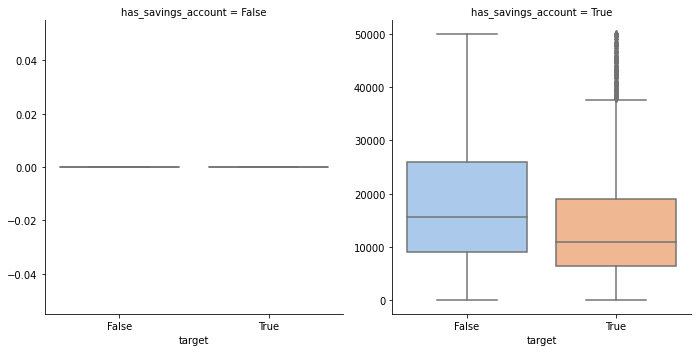

In [6]:
sns.catplot(data = data
            ,x = 'target'
            ,y = 'bal_savings_account'
            # ,hue = 'target'
            ,col = 'has_savings_account'
            ,kind = 'box'
            ,sharey = False
            ).set(ylabel = None)

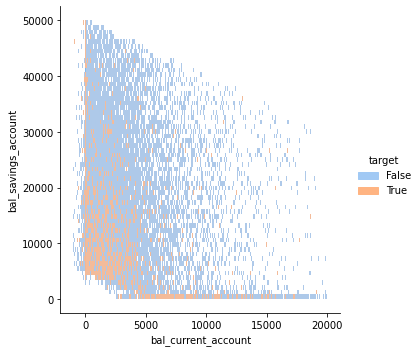

In [7]:
sns.displot(data=data
                , x = 'bal_current_account'
                , y = 'bal_savings_account'
                , hue = 'target'
               )

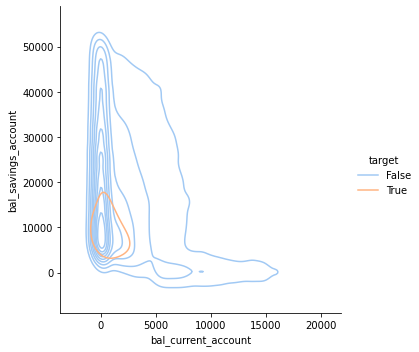

In [8]:
g = sns.displot(data=data
                , x = 'bal_current_account'
                , y = 'bal_savings_account'
                , hue = 'target'
                , kind = 'kde'
               )

## Categorical Data

In [9]:
cols_cat = data.select_dtypes(include = 'object').columns
cols_cat = cols_cat.drop('client_id')

for col in cols_cat:
    print(data[col].value_counts(dropna = False))
    print('-'*50)

1    32712
2    30985
Name: customer_gender, dtype: int64
--------------------------------------------------
9120    540
9100    523
8800    522
2800    452
2100    414
       ... 
1674      2
1402      2
7542      2
7382      2
3471      1
Name: customer_postal_code, Length: 1034, dtype: int64
--------------------------------------------------
9.0    58836
NaN     2002
4.0     1639
0.0      421
8.0      318
6.0      183
5.0      153
7.0      104
1.0       24
3.0       10
2.0        7
Name: customer_occupation_code, dtype: int64
--------------------------------------------------
NaN    47125
3.0     5015
2.0     4506
0.0     2178
5.0     2064
1.0     1802
4.0      696
6.0      311
Name: customer_education, dtype: int64
--------------------------------------------------
NaN           23364
no            22886
mature         4849
adolescent     3912
young          2652
preschool      2322
grownup        1908
onebaby        1466
yes             338
Name: customer_children, dtype: int64
--

/var/folders/k9/8r2lz4cj6qv_gpslncglrtc40000gn/T/ipykernel_87183/3893766800.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['customer_occupation_code', 'customer_education', 'customer_gender']].fillna(value = 0, inplace = True)
/var/folders/k9/8r2lz4cj6qv_gpslncglrtc40000gn/T/ipykernel_87183/3893766800.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['customer_children','customer_relationship']].fillna(value = 'unknown', inplace = True)
/opt/anaconda3/envs/BADM/lib/python3.9/site-packages/seaborn/categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of 

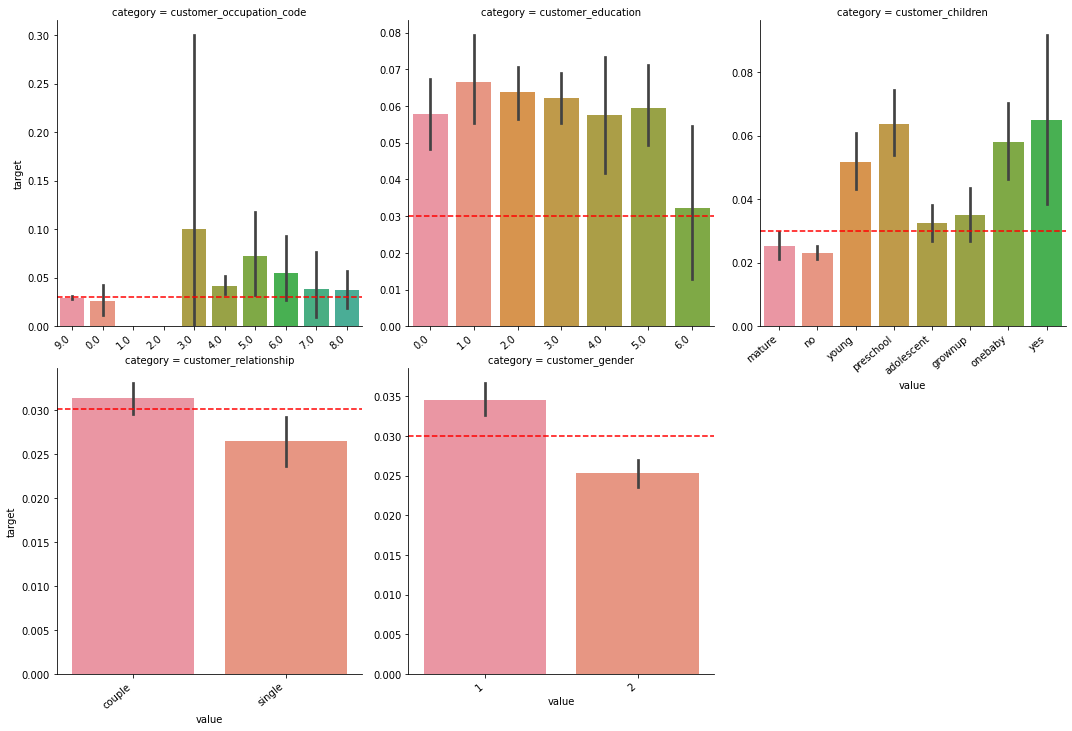

In [12]:
Y = 'target'
cols = ['customer_occupation_code', 'customer_education', 'customer_children',
       'customer_relationship','customer_gender']

# fill nan so they can also be plotted
data[['customer_occupation_code', 'customer_education', 'customer_gender']].fillna(value = 0, inplace = True)
data[['customer_children','customer_relationship']].fillna(value = 'unknown', inplace = True)

df = data.melt(id_vars=('client_id', Y), value_vars=cols, var_name='category', value_name='value',ignore_index=True)

g = sns.catplot(data = df
                , kind = 'bar'
                , x = 'value'
                , y = Y
                , col = 'category'
                , sharey = False
                , sharex = False
                , col_wrap = 3
               )
g.map(plt.axhline, y=data.target.mean(), ls='--', c='red')
g.set_xticklabels(rotation=40, ha="right")
g.set_ylabels(None)